In [1]:
# for predicting the diagonsis

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
df.drop('id',axis=1,inplace=True)# no use of id colmn

In [6]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# diagnosis involves 2 option m and b  so we dont have to select only two features are there

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
df['diagnosis'].replace({'M':1,'B':0},inplace=True)

In [10]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [11]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [12]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(df.drop('diagnosis',axis=1),df['diagnosis'],test_size=0.25,random_state=101)#
# in df['diagonosis']also can write 
df['diagnosis'].apply(lambda x:1 if x=='M' else 0)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    0
Name: diagnosis, Length: 569, dtype: int64

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model=LogisticRegression().fit(xtrain,ytrain)

In [17]:
ypred=model.predict(xtest)

In [18]:
model.score(xtest,ytest)# gives 94%

0.9440559440559441

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
ypred=model.predict(xtest)

In [21]:
print(confusion_matrix(ytest,ypred))# confusion matrix

[[83  5]
 [ 3 52]]


In [22]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        88
           1       0.91      0.95      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [23]:
## doubtt

In [24]:
model.coef_

array([[-1.85789894, -0.20403418,  0.23799832, -0.01578276,  0.07167153,
         0.34347471,  0.47240405,  0.20332315,  0.13061903,  0.0197409 ,
        -0.08209378, -0.71356376, -0.39419528,  0.14089864,  0.0046027 ,
         0.07324641,  0.09431044,  0.02670944,  0.03268745,  0.00679366,
        -1.95256285,  0.3774644 ,  0.05071229,  0.0385527 ,  0.12038596,
         1.02180333,  1.25879543,  0.38257889,  0.37541452,  0.10070769]])

In [25]:
import pandas as pd

In [26]:
coef_data=pd.DataFrame(model.coef_.T,columns=['Coef'],index=xtest.columns)

In [27]:
coef_data.sort_values(by='Coef',ascending=False)

,Coef
concavity_worst,1.258795
compactness_worst,1.021803
concavity_mean,0.472404
concave points_worst,0.382579
texture_worst,0.377464
symmetry_worst,0.375415
compactness_mean,0.343475
perimeter_mean,0.237998
concave points_mean,0.203323
area_se,0.140899


In [28]:
coef_data.index

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [29]:
#xtrain1=xtrain[['concavity_worst','compactness_worst','area_worst','concave points_worst']]
#xtest1=xtest[['concavity_worst','compactness_worst','area_worst','concave points_worst']]

In [30]:
#model1=LogisticRegression().fit(xtrain1,ytrain)

In [31]:
#model1.score(xtest1,ytest)

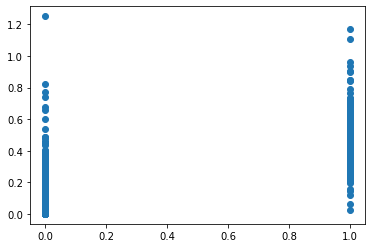

In [32]:
plt.scatter(df['diagnosis'],df['concavity_worst'])

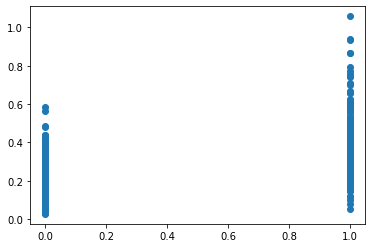

In [33]:
plt.scatter(df['diagnosis'],df['compactness_worst'])

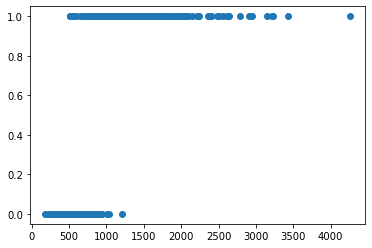

In [34]:
plt.scatter(df['area_worst'],df['diagnosis'])

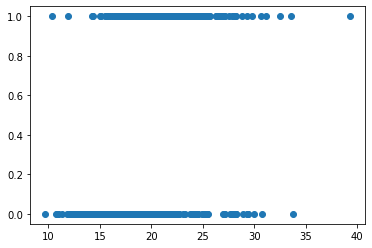

In [35]:
plt.scatter(df['texture_mean'],df['diagnosis'])

In [36]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

In [37]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
464,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,...,14.90,23.89,95.10,687.6,0.1282,0.19650,0.18760,0.10450,0.2235,0.06925
454,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,14.34,22.15,91.62,633.5,0.1225,0.15170,0.18870,0.09851,0.3270,0.07330
447,14.80,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.02260,0.1893,0.05886,...,16.43,22.74,105.90,829.5,0.1226,0.18810,0.20600,0.08308,0.3600,0.07285
363,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,...,18.13,25.45,117.20,1009.0,0.1338,0.16790,0.16630,0.09123,0.2394,0.06469
241,12.42,15.04,78.61,476.5,0.07926,0.03393,0.01053,0.01108,0.1546,0.05754,...,13.20,20.37,83.85,543.4,0.1037,0.07776,0.06243,0.04052,0.2901,0.06783


In [38]:
ytrain.head()

464    0
454    0
447    0
363    0
241    0
Name: diagnosis, dtype: int64

In [40]:
import numpy as np

In [41]:
d = {'Importance': np.round(tree.feature_importances_, 3) , 'Features': xtrain.columns}
feature_imp = pd.DataFrame(data=d)
feature_imp.sort_values(by='Importance',ascending=False)

,Importance,Features
27,0.703,concave points_worst
23,0.107,area_worst
13,0.056,area_se
16,0.019,concavity_se
8,0.018,symmetry_mean
19,0.018,fractal_dimension_se
1,0.015,texture_mean
24,0.013,smoothness_worst
28,0.012,symmetry_worst
21,0.010,texture_worst


In [42]:
from sklearn.ensemble import ExtraTreesClassifier
modelx = ExtraTreesClassifier(n_estimators=10)
modelx.fit(xtrain, ytrain)
coef = modelx.feature_importances_

In [43]:
coef_modelx= pd.DataFrame(coef.T,columns=['Coef'],index= xtest.columns)

In [44]:
coef_modelx.sort_values(by='Coef',ascending=False)

,Coef
concave points_worst,0.160254
radius_worst,0.114254
perimeter_worst,0.092306
radius_mean,0.072598
area_worst,0.070953
concavity_mean,0.066061
concave points_mean,0.058098
area_se,0.054647
concavity_worst,0.045730
area_mean,0.037825


In [45]:
xtrain1= xtrain[['concave points_worst','concavity_worst','compactness_worst','area_worst']]
xtest1= xtest[['concave points_worst','concavity_worst','compactness_worst','area_worst']]

In [46]:
model2 = LogisticRegression()

In [47]:
model2.fit(xtrain1,ytrain)

LogisticRegression()

In [48]:
model2.score(xtest1,ytest)*100

95.1048951048951

In [49]:
ypred = model2.predict(xtest1)
print(confusion_matrix(ytest,ypred))

[[86  2]
 [ 5 50]]


In [50]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        88
           1       0.96      0.91      0.93        55

    accuracy                           0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [51]:
### deployment

In [52]:
final_model = model2

In [53]:
pd.to_pickle(final_model,'BreastCancerPredictor')

In [54]:
model = pd.read_pickle('BreastCancerPredictor')

In [55]:
concave_points_worst = eval(input(''))
concavity_worst = eval(input(''))
compactness_worst = eval(input(''))
area_worst =  eval(input(''))

query = pd.DataFrame({
    'area_worst':[area_worst],
    'concave points_worst':[concave_points_worst],
    'concavity_worst':[concavity_worst],
    'compactness_worst': [compactness_worst]
})

 2016
 .29
 .64
 .66


In [56]:
query

,area_worst,concave points_worst,concavity_worst,compactness_worst
0,0.66,2016,0.29,0.64


In [57]:
print('Diagnosed as: {}'.format(model.predict(query)[0]))

Diagnosed as: 1
